# Auswahl von Labels mittels maschinellem Lernen
[apoc](https://github.com/haesleinhuepf/apoc) ermöglicht die Auswahl von beschrifteten Objekten anhand von Eigenschaften wie Größe, Form und Intensität in einem entsprechenden Bild. In diesem Beispiel werden wir längliche Objekte aus einer Instanzsegmentierung von Blobs auswählen.

In [1]:
import apoc

from skimage.io import imread
import pyclesperanto_prototype as cle
import numpy as np

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = imread('../../data/blobs.tif')
labels = cle.label(cle.threshold_otsu(image))
annotation = imread('../../data/label_annotation.tif')

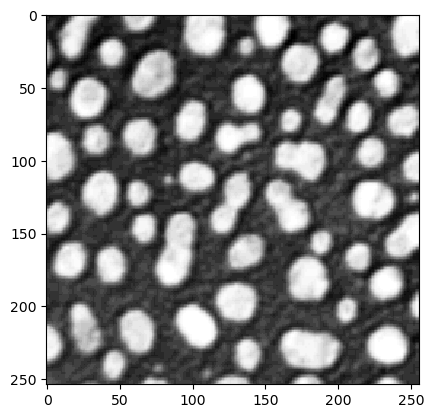

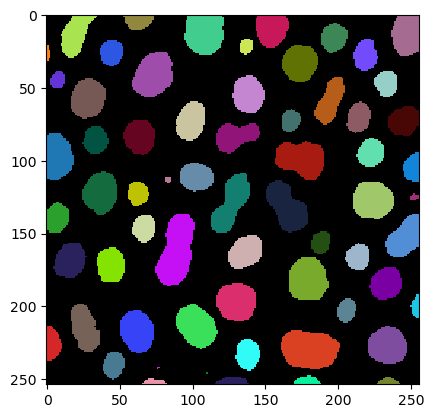

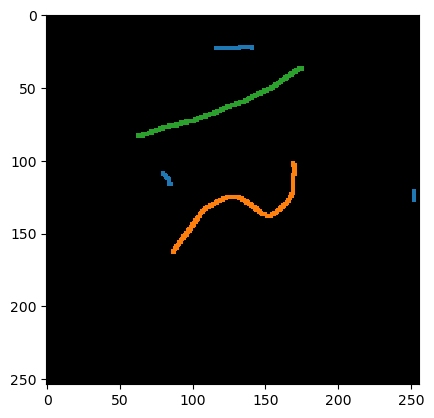

In [3]:
cle.imshow(image)
cle.imshow(labels, labels=True)
cle.imshow(annotation, labels=True)

## Training
Für das Training des Klassifikators müssen Sie Merkmale angeben. Im Folgenden verwenden wir die mittlere und standardabweichende Intensität innerhalb der beschrifteten Objekte sowie die Objektgröße und -form.

In [4]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

cl_filename = "object_selector.cl"

# Create an object classifier
apoc.erase_classifier(cl_filename) # delete it if it was existing before
classifier = apoc.ObjectSelector(cl_filename, positive_class_identifier=1)

# train it
classifier.train(features, labels, annotation, image)

## Vorhersage
Nachdem der Klassifikator trainiert wurde, können wir ihn zur Auswahl von Objekten verwenden.

23.0


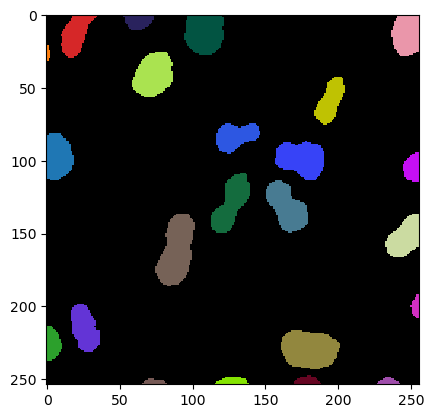

In [5]:
result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)

Man kann den Klassifikator auch von der Festplatte laden und auf einen anderen Datensatz anwenden. Wir demonstrieren das, indem wir den Klassifikator auf eine rotierte Version des oben gezeigten Bildes und Labelbildes anwenden.

23.0


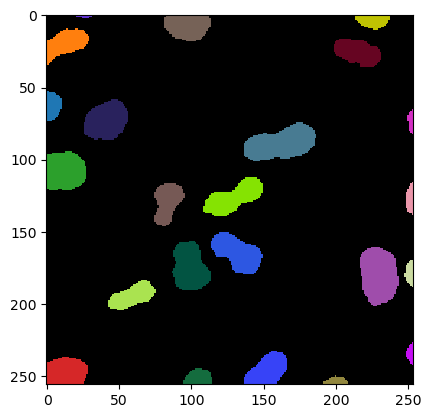

In [6]:
image1 = image.T
labels1 = cle.label(cle.threshold_otsu(image1))

classifier = apoc.ObjectSelector(cl_filename)

result = classifier.predict(labels1, image1)

print(result.max())

cle.imshow(result, labels=True)

Nach dem Training können wir den Klassifikator fragen, wie wichtig die Merkmale bei der Vorhersage waren.

In [7]:
classifier.feature_importances()

{'area': 0.29573084473661354,
 'mean_max_distance_to_centroid_ratio': 0.4264564597125618,
 'standard_deviation_intensity': 0.27781269555082466}

# Übung
Verwenden Sie den obigen Code und die Beispielbilder, um einen Klassifikator zu trainieren, der alle kleinen Objekte im Labelbild auswählt.